# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, I'm going to go through an examplle machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem Definition

Predict the future sale price of a bulldozer, given its characteristics and previous sales prices for similar bulldozers.

## 2. Data

Data comes from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview

The data for this competition is split into three parts:

* **Train.csv** is the training set, which contains data through the end of 2011.
* **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012 I will make predictions on this set throughout the majority of the competition. The score on this set is used to create the public leaderboard.
* **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. The score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project, visit: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

We want to minimize the RMSLE. Typically - in regression - the goal is to **minimize** the evaluation metric.

## 4. Features

Kaggle provides a data dictionary detailing all the features included in the data set. The file name in the zip file is **Data Dictionary.xlsx**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training and validation sets
df = pd.read_csv('Datasets/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False)

In [3]:
# Profile our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# Check nulls
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

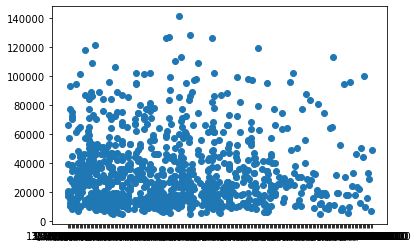

In [5]:
# Plotting without enhancing the date field
fig, ax = plt.subplots()

ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

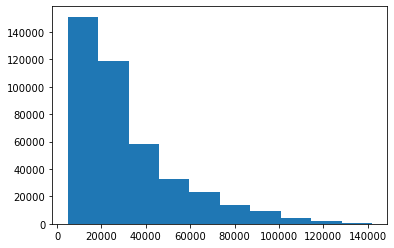

In [6]:
# Price distribution
fig, ax = plt.subplots()
ax.hist(df['SalePrice']);

In [7]:
# Date field default type
df.saledate.dtype

dtype('O')

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [18]:
# Import data again, but this time parse dates
df = pd.read_csv('Datasets/bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory=False,
                parse_dates=['saledate'])

In [19]:
# Now check the data type
df.saledate.dtype

dtype('<M8[ns]')

In [20]:
# Sample the field
df.saledate[:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

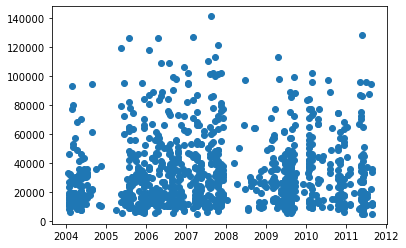

In [21]:
# Now plot the sales date with sales prices
fig, ax = plt.subplots()

ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

In [22]:
# View all of our columns by transposing in jupyter notebook
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [23]:
# Sort DataFrame by saledate
df.sort_values(by=['saledate'],
              inplace=True,
              ascending=True)

In [24]:
# Sample top 5
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [25]:
# Make a copy of the dataframe so if we mess up, we've still got our baseline dataframe
df_tmp = df.copy()

In [26]:
# Confirm
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Feature Engineering

Creating new features and altering current features. This is really just data transformation.

In [27]:
# Add some datetime parameters for the saledate column
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['SaleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['SaleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [28]:
# Confirm new columns
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [29]:
# Drop sale date since we are not going to use it anymore
df_tmp.drop('saledate',axis=1,inplace=True)

### Modeling

I've done a little EDA (I could always do much more) but I"m going to start to do some model-driven EDA.

In [30]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=10)

x = df_tmp.drop('SalePrice',axis=1)
y = df_tmp.SalePrice

model.fit(x,y) # Doesn't work because we haven't encoded our data yet

ValueError: could not convert string to float: 'Low'

### Converting our strings to pandas categories

One way I can quickly turn all of the data into numbers is by converting them into pandas categories. 

More on categories here: https://pandas.pydata.org/docs/user_guide/categorical.html

In [31]:
# Confirming is_string_dtype function
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

True

In [32]:
# Print all of our string data types
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [33]:
# Testing what df.items() does
random_dict = {'key1': 'hello',
              'key2': 'world!'}

for key,value in random_dict.items():
    print(f'This is a key {key}')
    print(f'This is a value {value}')

This is a key key1
This is a value hello
This is a key key2
This is a value world!


In [34]:
# Actually changing all the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [35]:
# Checking the changes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [36]:
# Access the numeric value of the categories
df_tmp.state.cat.codes, df_tmp.state

(205615    43
 274835     8
 141296     8
 212552     8
 62755      8
           ..
 410879     4
 412476     4
 411927     4
 407124     4
 409203     4
 Length: 412698, dtype: int8,
 205615         Texas
 274835       Florida
 141296       Florida
 212552       Florida
 62755        Florida
              ...    
 410879    California
 412476    California
 411927    California
 407124    California
 409203    California
 Name: state, Length: 412698, dtype: category
 Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming'])

In [37]:
# Check missing values in the dataframe
df_tmp.isna().sum() / len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save our preprocessed data

In [38]:
# Export current tmp dataframe
df_tmp.to_csv('Datasets/bluebook-for-bulldozers/train_tmp.csv',
             index=False)

In [39]:
# Import preprocessed data
df_tmp = pd.read_csv('Datasets/bluebook-for-bulldozers/train_tmp.csv',
                    low_memory=False)

In [40]:
# Sample our dataset
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Fill our missing values

#### Fill missing numerical values

In [41]:
# Check for all numeric columns
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
SaleDayOfWeek
SaleDayOfYear


In [42]:
# Check for all numeric columns with nulls
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary flag column which tells us if the data was midding
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median()) # Using median to account for outliers

In [43]:
# Confirm the above
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [44]:
# Confirm the flag we added
df_tmp.auctioneerID_is_missing.sum() # returns the amount of missing columns we had

20136

#### Fill missing categorical values

In [45]:
# Check for all non numeric columns
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [46]:
# Demonstrating how to access codes of categorical dtype
pd.Categorical(df_tmp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [47]:
# Pandas handles missing categorical values with a -1
pd.Categorical(df_tmp['UsageBand']).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [48]:
# Turn categorical variables into numbers and fill missing
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1 to account for negatives
        df_tmp[label] = pd.Categorical(content).codes + 1

In [49]:
# Confirm the above
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [50]:
# Quick confirmation
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [51]:
# Check new types again
df_tmp.dtypes

SalesID                           int64
SalePrice                       float64
MachineID                         int64
ModelID                           int64
datasource                        int64
                                 ...   
Backhoe_Mounting_is_missing        bool
Blade_Type_is_missing              bool
Travel_Controls_is_missing         bool
Differential_Type_is_missing       bool
Steering_Controls_is_missing       bool
Length: 103, dtype: object

In [52]:
%%time 
# Print how long each cell is taking to run
# I want to focus on reducing the time between experiments because majority of DS is experimentation. 
# I want to figure out what is wrong and what is right as fast as possible.

CPU times: total: 0 ns
Wall time: 0 ns


In [53]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                             random_state=10)

# Fit the model (x and y)
model.fit(df_tmp.drop('SalePrice',axis=1), df_tmp['SalePrice'])

CPU times: total: 32min 52s
Wall time: 2min 28s


RandomForestRegressor(n_jobs=-1, random_state=10)

In [54]:
# Score the model (just testing)
model.score(df_tmp.drop('SalePrice',axis=1), df_tmp['SalePrice']) # Remember this is scoring on the SAME data I fit the model on

0.9875911397325439

**Generalization:** The ability for a machine learning model to perform well on data it hasn't seen before.

### Splitting Data into Training and Validation sets (for time series data)

In [55]:
# Split data based on year (Confirmed on Kaggle)
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]
len(df_val), len(df_train)

(11573, 401125)

In [57]:
# Split data into x and y
x_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
x_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val.SalePrice

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## There is a big error in the way I have done things above:
I filled the missing data in the combined training and validation set before splitting it into separate training and validation sets. 

In the future, I will need to remember to encode/transform all the **categorical variables** of the data on the entire dataset, ensuring that categorical variables
are encoded the same across training/test sets. THEN I should split the data **before** filling the **numerical values** in the training set and validation set separately. 

## Building An Evaluation Function

In [66]:
# Create Evaluation Function (using RMSLE based on the project requirements)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score 

def root_mean_squared_log_error(y_test, y_preds):
    """
    Calculates the root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create another function to evaluate our model on a few different levels
def show_scores(model, x_train, x_valid):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
             'Validation MAE': mean_absolute_error(y_valid, val_preds),
             'Training RMSLE': root_mean_squared_log_error(y_train, train_preds),
             'Validation RMSLE': root_mean_squared_log_error(y_valid, val_preds),
             'Training R-squared': r2_score(y_train, train_preds),
             'Validation R-squared': r2_score(y_valid, val_preds)}
    return scores

In [62]:
### Testing our model on a subset (for hyperparameter tuning)
model = RandomForestRegressor(n_jobs=-1,
                             random_state=10,
                             max_samples=10000)

In [63]:
%%time 

# Cutting down on the max number of samples each estimate can see improved training time
model.fit(x_train, y_train)

CPU times: total: 57.1 s
Wall time: 6.51 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=10)

In [68]:
# Evaluate
show_scores(model,x_train, x_valid)

{'Training MAE': 5566.361924636958,
 'Validation MAE': 7174.238524151041,
 'Training RMSLE': 0.2577270048078371,
 'Validation RMSLE': 0.2946130193603268,
 'Training R-squared': 0.8603610703100426,
 'Validation R-squared': 0.8334499855901978}

### Hyperparameter Tuning with RandomizedSearchCV

In [77]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters to test
rf_grid = {'n_estimators': np.arange(10,100,10),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2),
          'max_features': [0.5, 1, 'sqrt', 'auto']}

# Instantiate GridSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=10,max_samples=10000),
                       param_distributions=rf_grid,
                       n_iter=20,
                       cv=5,
                       verbose=True)

# Fit the model
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 4min 3s
Wall time: 5min 17s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_samples=10000, n_jobs=-1,
                                                   random_state=10),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [79]:
# Find the best model hyperparameters based on RandomizedSearchCV

rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_features': 0.5,
 'max_depth': None}

In [80]:
# Score the RandomizedSearchCV model
show_scores(rs_model,x_train, x_valid) # Scores actually went down because we are limiting the number of iterations and the default parameters are good

{'Training MAE': 6335.634455720833,
 'Validation MAE': 7735.652456515229,
 'Training RMSLE': 0.28562718718368574,
 'Validation RMSLE': 0.31355828080411285,
 'Training R-squared': 0.8207630915707328,
 'Validation R-squared': 0.8069269144404823}

### Training a model with the best hyperparameters
**NOTE:** These hyperparameters were found after 100 iterations on the hyperparameter grid above.

In [81]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=10)

# Fit the ideal modeel
ideal_model.fit(x_train,y_train)

CPU times: total: 6min 37s
Wall time: 33.1 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [83]:
# Scores for ideal modeel trained on all the data
show_scores(ideal_model,x_train,x_valid)

{'Training MAE': 2949.2248932607295,
 'Validation MAE': 5956.144020794196,
 'Training RMSLE': 0.14435645974603833,
 'Validation RMSLE': 0.2461986193980252,
 'Training R-squared': 0.9590050593886251,
 'Validation R-squared': 0.8817344801960382}

In [84]:
# Scores for rs model on only 10000 samples
show_scores(rs_model,x_train, x_valid)

{'Training MAE': 6335.634455720833,
 'Validation MAE': 7735.652456515229,
 'Training RMSLE': 0.28562718718368574,
 'Validation RMSLE': 0.31355828080411285,
 'Training R-squared': 0.8207630915707328,
 'Validation R-squared': 0.8069269144404823}

## Make Predictions on Test Data

In [86]:
# Import the test data
df_test = pd.read_csv('Datasets/bluebook-for-bulldozers/Test.csv',
                     low_memory=False,
                     parse_dates=['saledate'])

df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


### Preprocessing the data (getting the test dataset in the same format as the training dataset)

In [90]:
def preprocess_data(df):
    """
    Performs some transformations on a dataframe and returns a transformed dataframe.
    """
    # Extract date info
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['SaleDayOfWeek'] = df.saledate.dt.dayofweek
    df['SaleDayOfYear'] = df.saledate.dt.dayofyear
    df.drop('saledate', axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary flag column which tells us if the data was missing
                df[label+'_is_missing'] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median()) # Using median to account for outliers
            
        # Fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            # We add +1 to category code because missing categories are encoded as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [92]:
# Preprocess the data
df_test = preprocess_data(df_test)
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [93]:
# Confirm
x_train.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [94]:
# Notice that the column count is different
# Check with below
set(x_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [95]:
# Manually add the missing column to our test dataframe
df_test['auctioneerID_is_missing'] = False

In [96]:
# Confirm above
set(x_train.columns) - set(df_test.columns)

set()

In [97]:
# Make some predictions
test_preds = ideal_model.predict(df_test)

C:\Users\Marlon.Holland\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


We still need to format predictions into the format that Kaggle wants: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluationd

In [100]:
# Format into the Kaggle format
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds

In [101]:
# Confirm
df_preds.head()

,SalesID,SalesPrice
0,1227829,18507.437592
1,1227844,18735.467399
2,1227847,47414.427761
3,1227848,58612.731613
4,1227863,44495.523378


In [102]:
# Export prediction data
df_preds.to_csv('Datasets/bluebook-for-bulldozers/test_predictions.csv',index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable.

In [106]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.22633349e-02, 1.69299752e-02, 4.09901836e-02, 1.84003585e-03,
       3.33073719e-03, 2.07455633e-01, 3.12607996e-03, 9.96816058e-04,
       4.36478060e-02, 6.07872051e-02, 6.31619800e-02, 4.92208163e-03,
       2.49769610e-02, 1.51535222e-01, 4.49955759e-02, 5.92851390e-03,
       1.59490188e-03, 2.35888685e-03, 4.55382898e-03, 4.69881873e-02,
       5.23239841e-04, 1.27277487e-04, 7.84693046e-04, 1.57416036e-04,
       1.26948802e-03, 2.32165232e-05, 8.31633863e-04, 8.26008790e-03,
       1.38212441e-03, 4.13279372e-03, 4.32433678e-03, 2.17031903e-03,
       3.68262898e-03, 7.99900862e-04, 7.79580169e-04, 1.18472500e-02,
       7.71034852e-04, 1.12388524e-02, 2.60170993e-03, 2.39108378e-03,
       1.37569703e-03, 1.07584427e-03, 4.41956747e-03, 6.91680032e-04,
       5.38995655e-04, 4.03533539e-04, 1.64496340e-04, 3.58812967e-03,
       8.58056272e-04, 2.38572455e-04, 5.40903771e-04, 7.40872915e-02,
       3.79318672e-03, 5.61957183e-03, 2.89251307e-03, 9.94481910e-03,
      

In [117]:
# Let's visualize the feature importance
def plot_features(columns, importances, n=20):
    # Pandas chaining to create the dataframe
    df = (pd.DataFrame({'features': columns,
                       'feature_importances': importances})
         .sort_values('feature_importances', ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()

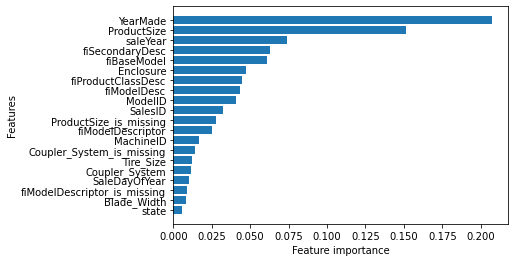

In [118]:
# Test the function
plot_features(x_train.columns, ideal_model.feature_importances_)